In [1]:
# TODO: Analyze data on the race distribution on the different offenses

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Open the data
data = pd.read_csv("arrests_national_juvenile.csv")

In [4]:
data

,id,year,state_abbr,offense_code,offense_name,agencies,population,total_male,total_female,m_0_9,...,f_13_14,f_15,f_16,f_17,race_agencies,race_population,white,black,asian_pacific_islander,american_indian
0,1081,2016,NaN,ASR_ARSON,Arson,13310,264534532,1760,328,117.0,...,114.0,66.0,39.0,43,12581,263887632,1436,516,41.0,48.0
1,1082,2016,NaN,ASR_AST,Aggravated Assault,13310,264534532,16997,5918,141.0,...,1565.0,1171.0,1337.0,1361,12581,263887632,12370,9736,296.0,364.0
2,1083,2016,NaN,ASR_AST_SMP,Simple Assault,13310,264534532,66360,38712,1043.0,...,11210.0,8036.0,8264.0,7590,12581,263887632,59778,41923,1130.0,1378.0
3,1084,2016,NaN,ASR_BRG,Burglary,13310,264534532,23307,3071,167.0,...,727.0,618.0,689.0,833,12581,263887632,14413,11082,368.0,362.0
4,1085,2016,NaN,ASR_CUR,Curfew and Loitering Law Violations,13310,264534532,19218,8319,110.0,...,1991.0,1887.0,2267.0,1701,12581,263887632,15468,11045,382.0,429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,446,1994,NaN,ASR_STP,Stolen Property,10713,208091172,32205,4105,211.0,...,1150.0,905.0,937.0,863,10282,207684879,21242,14077,587.0,364.0
686,447,1994,NaN,ASR_SUS,Suspicion,10713,208091172,1389,330,30.0,...,99.0,76.0,64.0,58,10282,207684879,1171,521,5.0,22.0
687,448,1994,NaN,ASR_VAG,Vagrancy,10713,208091172,2979,683,15.0,...,206.0,143.0,159.0,149,10282,207684879,2599,1010,40.0,13.0
688,449,1994,NaN,ASR_VAN,Vandalism,10713,208091172,110175,12616,5621.0,...,4161.0,2272.0,2050.0,1864,10282,207684879,98391,20722,2073.0,1257.0


## Initial Exploratory Data Analysis

In [5]:
# See the columns that have missing values
data.isnull().sum()

id                          0
year                        0
state_abbr                690
offense_code                0
offense_name                0
agencies                    0
population                  0
total_male                  0
total_female                0
m_0_9                      36
m_10_12                     5
m_13_14                     0
m_15                        0
m_16                        0
m_17                        0
f_0_9                      96
f_10_12                    39
f_13_14                     9
f_15                        6
f_16                        3
f_17                        0
race_agencies               0
race_population             0
white                       0
black                       0
asian_pacific_islander     12
american_indian            29
dtype: int64

We see that there is some missing data. 
* State abbreviation is completely missing, which could be for security/confidential reasons
* There is missing data on some of the age ranges for the gender breakdown, which is unusual as according to the FBI CDE must report age and sex. However it may be possible to calculate for males using the total male. 
* There is some data missing regarding number of Asian Pacific Islanders and American Indians arrests, however it said in the FBI CDE that not all agencies report the race/ethnicity of arrests.

In [6]:
# Find the number of arrests in every year
data["year"].value_counts()

2016    30
2004    30
1995    30
1996    30
1997    30
1998    30
1999    30
2000    30
2001    30
2002    30
2003    30
2005    30
2015    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
1994    30
Name: year, dtype: int64

### Explore the data on the Number of Juvenile Arrests per Year
* Look at total number of juvenile arrests per year
* Break down the total number of arrests by gender
* Break down the total number of arrests by age range 
* Break down the total number of arrests by race/ethnicity
* Break down the total number of arrests by the top three offences

In [7]:
# Which year had the most amount of crime?
totals = data[["total_male", "total_female"]].sum(axis = 1)
data["Total"] = totals

Text(0.5, 1.0, 'Total Number of Juvenile Arrests (1994 - 2016)')

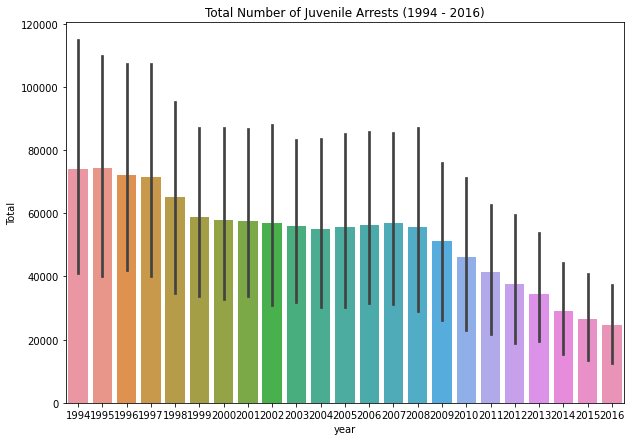

In [8]:
plt.figure(figsize = (10,7))
sns.barplot(data = data, x = "year", y = "Total")
plt.title("Total Number of Juvenile Arrests (1994 - 2016)")

From the plot above we can see a few trends
* The average amount of arrests in general decreases over the course of 22 years
* The standard deviations vary wildly, meaning that there is high variability of arrests over different states, therefore states have a highly varying number of arrests
* The decrease in arrests could be due to lax policing or harsher laws that deter juveniles from crime

In [9]:
# Find the number of different crimes
crimes = data["offense_name"].unique()
num_crimes = len(data["offense_name"].unique())
print(f"There are {num_crimes} different crimes listed and they are:\n {crimes}")

There are 30 different crimes listed and they are:
 ['Arson' 'Aggravated Assault' 'Simple Assault' 'Burglary'
 'Curfew and Loitering Law Violations' 'Disorderly Conduct'
 'Drug Abuse Violations' 'Drunkenness' 'Drive Under the Influence'
 'Embezzlement' 'Offenses Against the Family and Children'
 'Forgery and Counterfeiting' 'Fraud' 'Gambling'
 'Murder and Nonnegligent Homicide' 'Liquor Laws' 'Larceny'
 'Manslaughter by Negligence' 'Motor Vehicle Theft' 'All Other Offenses'
 'Prostitution and Commercialized Vice' 'Robbery' 'Rape' 'Runaway'
 'Sex Offenses' 'Stolen Property' 'Suspicion' 'Vagrancy' 'Vandalism'
 'Weapons']


C:\Users\srisk\AppData\Local\Temp/ipykernel_17120/4177706387.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totals_df = totals_df.groupby("year")["total_male", "total_female"].sum()


Text(0.5, 1.0, 'Number of Juvenile Arrests by Gender')

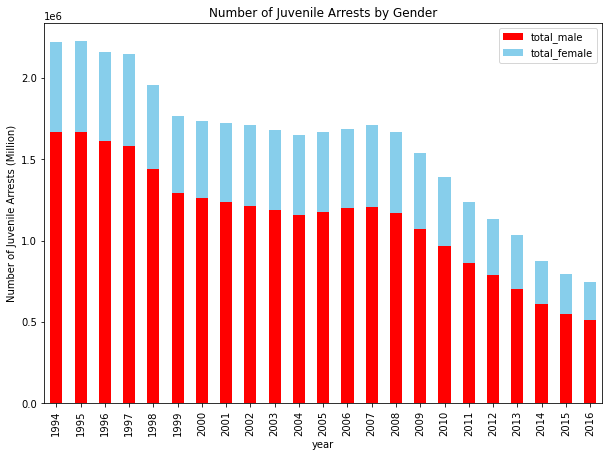

In [191]:
# Find the distribution of crimes in the year per per gender

# Create a sub DataFrame of the totals for every year
totals_df = data[["year","total_male", "total_female"]]
totals_df = totals_df.groupby("year")["total_male", "total_female"].sum()

# Create a stacked barplot

totals_df.plot(figsize = (10,7), kind='bar', stacked=True, color=['red', 'skyblue'])
plt.ylabel("Number of Juvenile Arrests (Million)")
plt.title("Number of Juvenile Arrests by Gender")

From looking at the plot comparing the number of juvenile arrests broken down by gender we notice that
* Males far outnumber women in number of arrests across all years
* It appears that for all years, the number of male arrests is about double than that of female arrests

C:\Users\srisk\AppData\Local\Temp/ipykernel_17120/3006453644.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  male_age_df = male_age_df.groupby("year")["m_0_9", "m_10_12", "m_13_14", "m_15", "m_16", "m_17"].sum()
C:\Users\srisk\AppData\Local\Temp/ipykernel_17120/3006453644.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  female_age_df = female_age_df.groupby("year")["f_0_9", "f_10_12", "f_13_14", "f_15", "f_16", "f_17"].sum()


Text(0.5, 1.0, 'Number of Female Juvenile Arrests by Age Range')

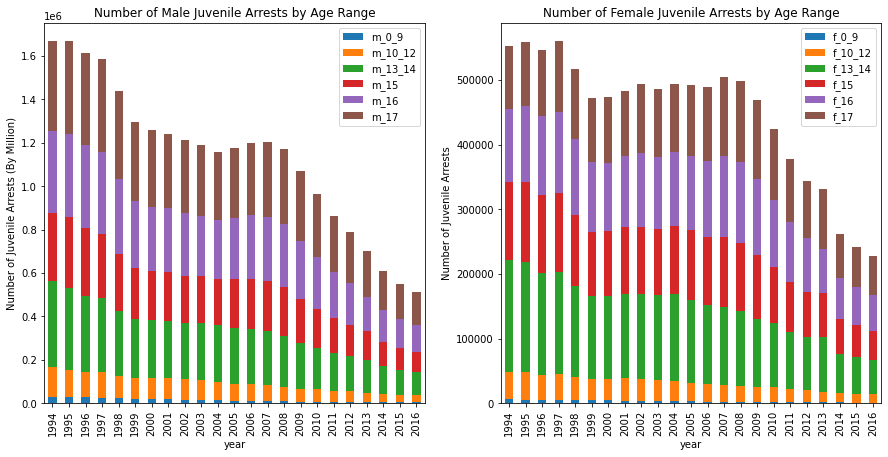

In [190]:
# Break down total number of arrests by age range

# Create a sub DataFrame of the totals for every year
male_age_df = data[["year","m_0_9", "m_10_12", "m_13_14", "m_15", "m_16", "m_17"]]
male_age_df = male_age_df.groupby("year")["m_0_9", "m_10_12", "m_13_14", "m_15", "m_16", "m_17"].sum()

female_age_df = data[["year","f_0_9", "f_10_12", "f_13_14", "f_15", "f_16", "f_17"]]
female_age_df = female_age_df.groupby("year")["f_0_9", "f_10_12", "f_13_14", "f_15", "f_16", "f_17"].sum()

# Create a stacked barplots
ax = plt.subplot(1,2,1)
male_age_df.plot(figsize = (15,7), kind='bar', stacked=True, ax = ax)
plt.ylabel("Number of Juvenile Arrests (By Million)")
plt.title("Number of Male Juvenile Arrests by Age Range")

ax = plt.subplot(1,2,2)
female_age_df.plot(figsize = (15,7), kind='bar', stacked=True, ax = ax)
plt.ylabel("Number of Juvenile Arrests")
plt.title("Number of Female Juvenile Arrests by Age Range")

In [12]:
# Find the age range with the highest juvenile arrests per year by gender

# Males
highest_age_male_df = male_age_df[["m_0_9", "m_10_12", "m_13_14", "m_15", "m_16", "m_17"]].idxmax(axis=1)
print(f"Male Age Range DataFrame:\n {highest_age_male_df}")
print([[l, highest_age_male_df.tolist().count(l)] for l in set(highest_age_male_df.tolist())])
print("")
# Females
highest_age_female_df = female_age_df[["f_0_9", "f_10_12", "f_13_14", "f_15", "f_16", "f_17"]].idxmax(axis=1)
print(f"Female Age Range DataFrame:\n {highest_age_female_df}")
print([[l, highest_age_female_df.tolist().count(l)] for l in set(highest_age_female_df.tolist())])

Male Age Range DataFrame:
 year
1994    m_17
1995    m_17
1996    m_17
1997    m_17
1998    m_17
1999    m_17
2000    m_17
2001    m_17
2002    m_17
2003    m_17
2004    m_17
2005    m_17
2006    m_17
2007    m_17
2008    m_17
2009    m_17
2010    m_17
2011    m_17
2012    m_17
2013    m_17
2014    m_17
2015    m_17
2016    m_17
dtype: object
[['m_17', 23]]

Female Age Range DataFrame:
 year
1994    f_13_14
1995    f_13_14
1996    f_13_14
1997    f_13_14
1998    f_13_14
1999    f_13_14
2000    f_13_14
2001    f_13_14
2002    f_13_14
2003    f_13_14
2004    f_13_14
2005    f_13_14
2006    f_13_14
2007       f_16
2008       f_17
2009       f_17
2010       f_17
2011       f_17
2012       f_17
2013       f_17
2014       f_17
2015       f_17
2016       f_17
dtype: object
[['f_16', 1], ['f_17', 9], ['f_13_14', 13]]


After breaking down the total number of juvenile arrests by age group we learn a few more patterns
* For males, the older the age range, the higher the number of juvenile arrests
* For males, for all years the most number of juvenile arrests were for those of age 17
* For females, the breakdown is more interesting
    * From 1994 - 2006, the most number of juvenile arrests were between the ages of 13 - 14
    * In 2007, the most number of juvenile arrests were females of age 16
    * From 2008 onwards, the most number of juvenile arrests were of age 17
    
Note: As we initially saw in the earlier EDA, there is missing data for the ages, especially for f_0_9 and f_10_12 which may affect the results. However the this will most likely not make any difference as we have seen from the initial age range breakdown that those of 0_9 age range and 10_12 range do not have many juvenile arrests.

C:\Users\srisk\AppData\Local\Temp/ipykernel_17120/4035999076.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  race_df = race_df.groupby("year")["white", "black", "asian_pacific_islander", "american_indian"].sum()


Text(0.5, 1.0, 'Number of Juvenile Arrests by Race/Ethnicity')

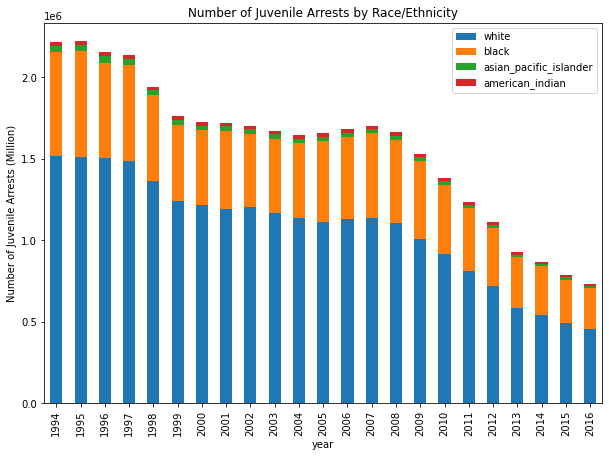

In [14]:
# Break down total number of juvenile arrests by race
race_df = data[["year","white", "black", "asian_pacific_islander", "american_indian"]]
race_df = race_df.groupby("year")["white", "black", "asian_pacific_islander", "american_indian"].sum()

# Create the stacked barplot
race_df.plot(figsize = (10,7), kind='bar', stacked=True)
plt.ylabel("Number of Juvenile Arrests (Million)")
plt.title("Number of Juvenile Arrests by Race/Ethnicity")


From the plot above, we see that across all years the highest number of juvenile arrests have been for white people
* White and black make up a huge majority of the total number of juvenile arrests

C:\Users\srisk\AppData\Local\Temp/ipykernel_17120/2154587326.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  offenses_total = offenses_total.groupby(["offense_name"])["total_male", "total_female"].sum()


Text(0.5, 1.0, 'Number of Juvenile Offenses 1994 - 2016')

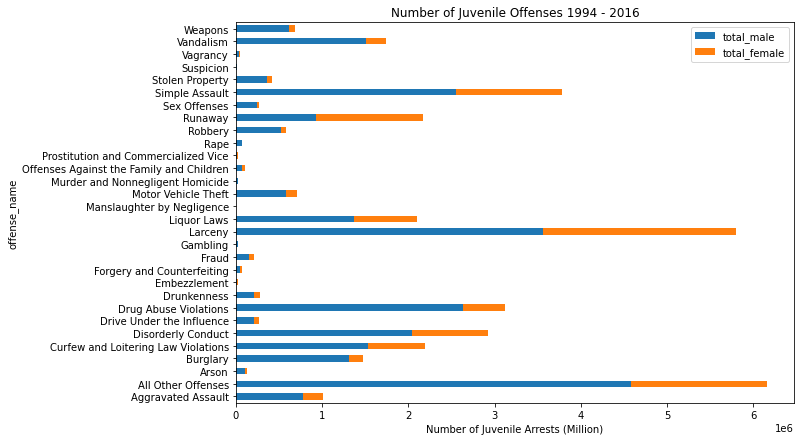

In [186]:
# Break down the total number of arrests summing all years for each offense
offenses_total = data[["total_male", "total_female", "offense_name"]]
offenses_total = offenses_total.groupby(["offense_name"])["total_male", "total_female"].sum()

# Stacked barplot for each offense by gender
offenses_total.plot(figsize = (10,7), kind='barh', stacked=True)
plt.xlabel("Number of Juvenile Arrests (Million)")
plt.title("Number of Juvenile Offenses 1994 - 2016")

From the plot above, we see that from 1994 - 2016, the top three highest juvenile offenses are some other offense not on the list, larceny, and simple assault. We also see that in accordance with the previous plots, men have more offenses than women across all offense types. 

In [32]:
# Let us check to see if "All Other Offenses", "Larceny", and "Simple Assault" are the top crimes over each year
top_offenses = data[["year", "Total", "offense_name"]]

Text(0.5, 0.98, 'Top Three Juvenile Offenses From 1994 - 2016')

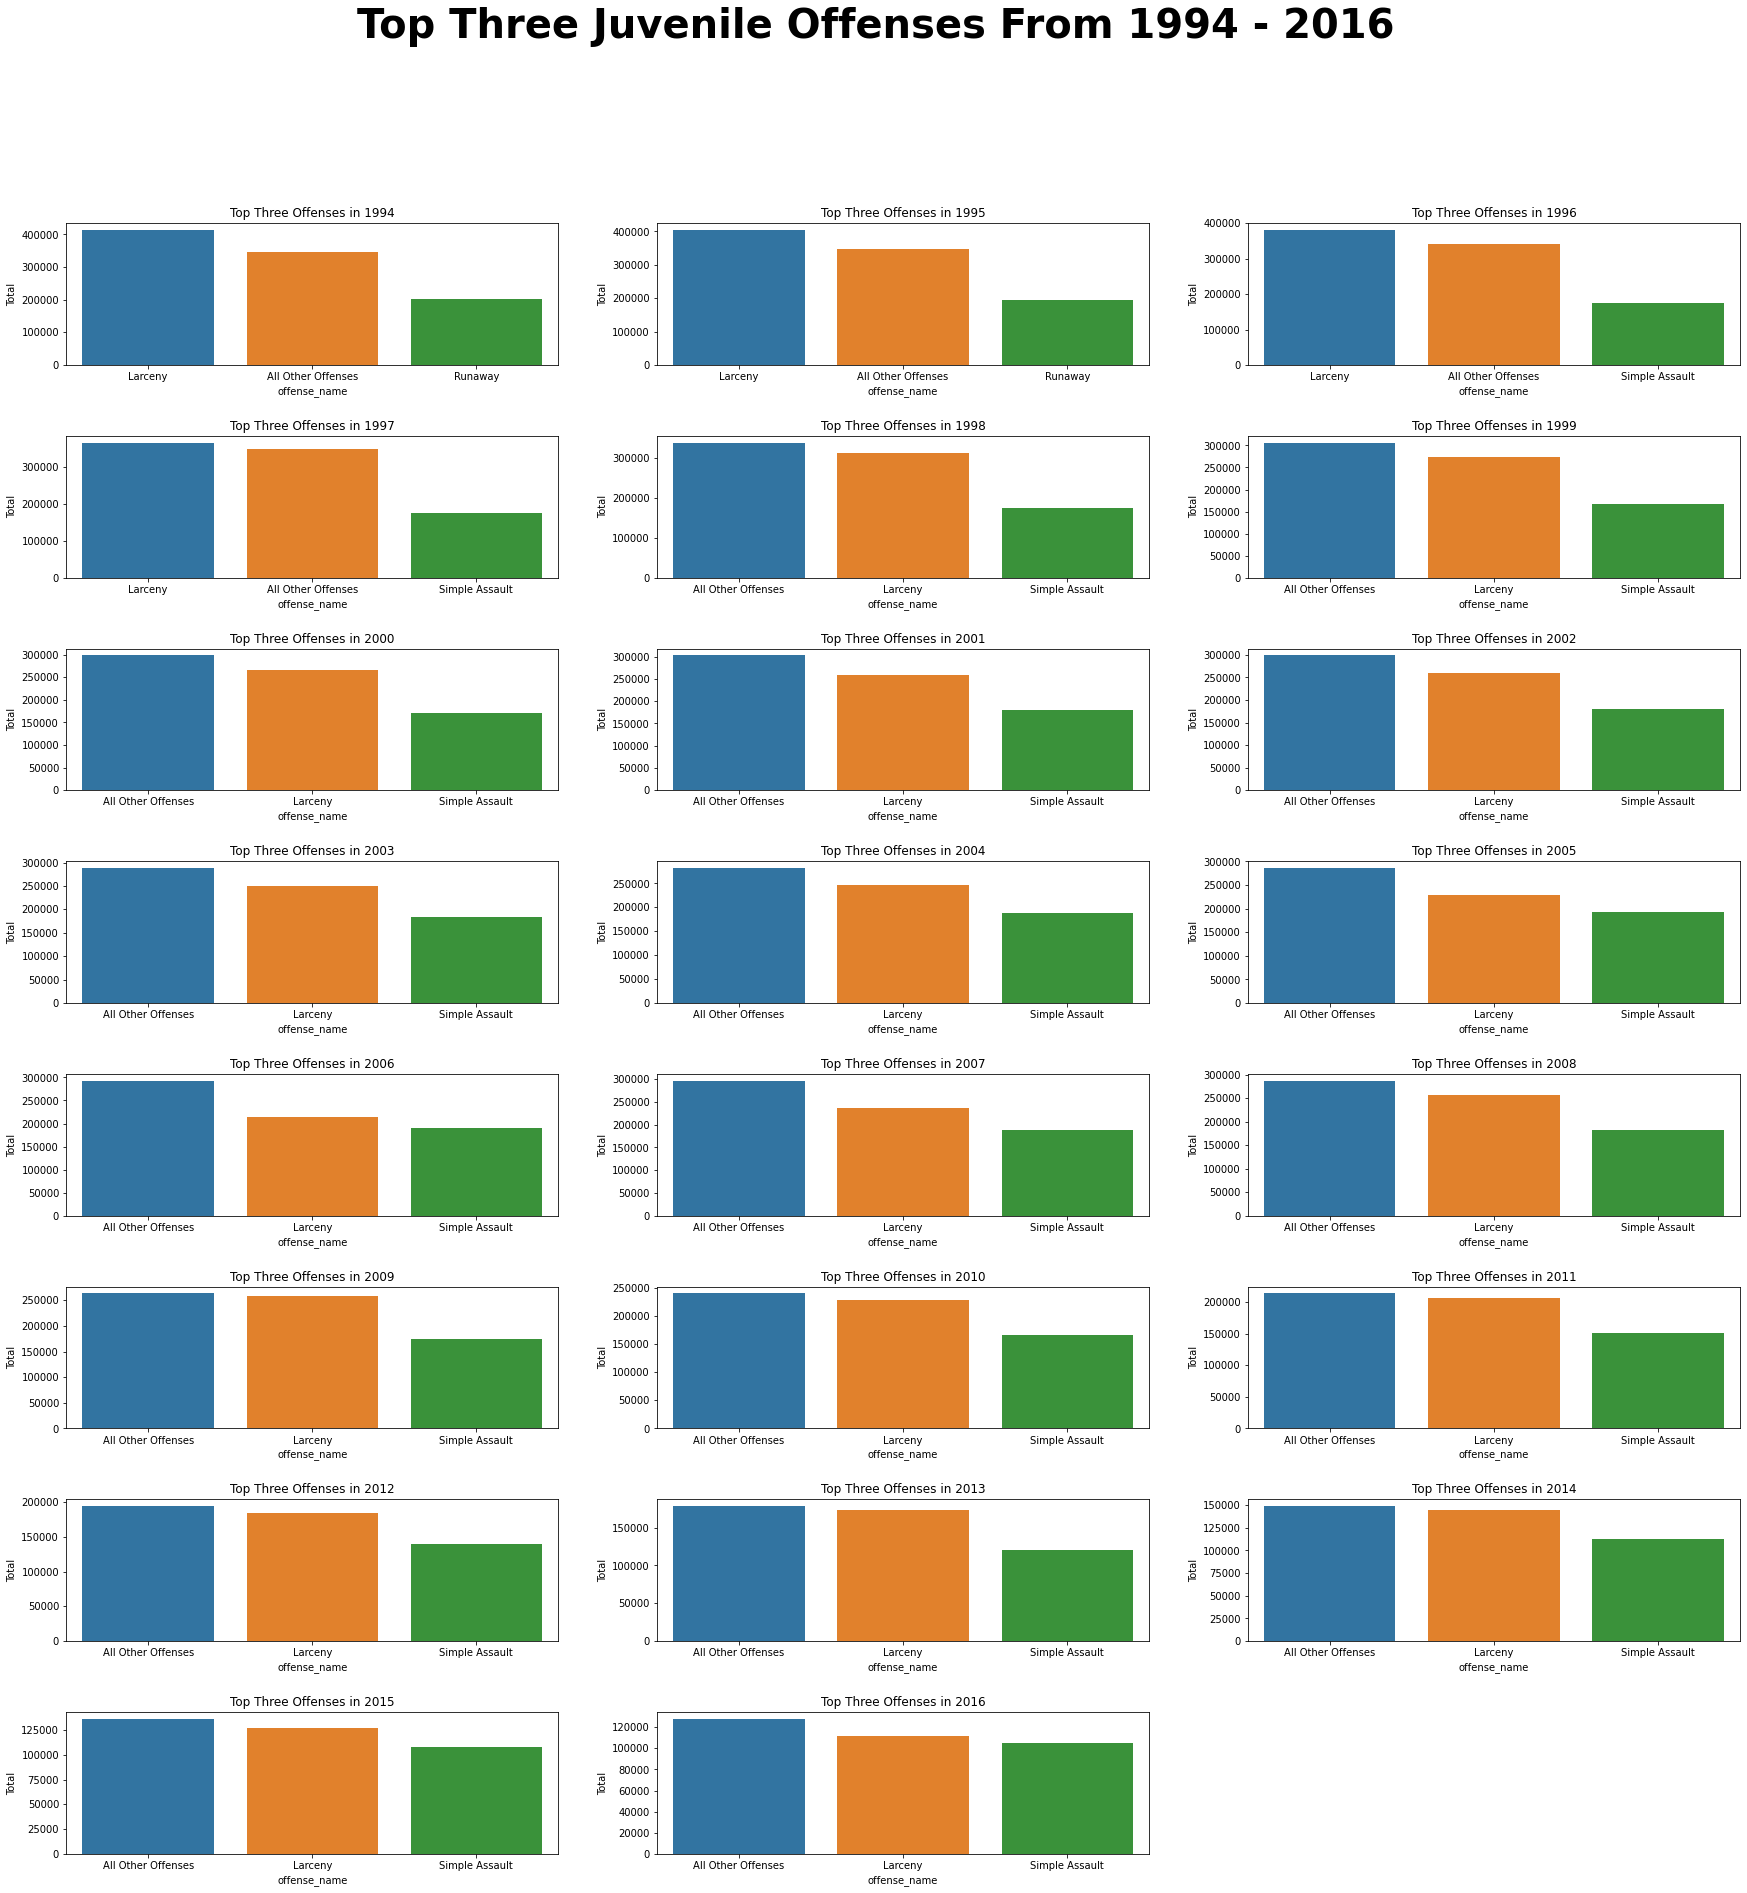

In [106]:
years_list = top_offenses["year"].unique().tolist()[::-1]

# Iterate through the years to create individual barplots for the year
plt.figure(figsize = (30,30))
for i, year in enumerate(years_list):
    ax = plt.subplot(8,3,i+1)
    plt.subplots_adjust(hspace=0.5)
    year_total = top_offenses.query(f"year == {str(year)}")
    sorted_years = year_total.sort_values(by = ["Total"], ascending = False)
    top_three_offenses = sorted_years.head(3)
    sns.barplot(data = top_three_offenses, x = "offense_name", y = "Total", ax = ax)
    ax.set_title(f"Top Three Offenses in {year}")
plt.suptitle("Top Three Juvenile Offenses From 1994 - 2016", fontsize = 40, fontweight = "bold")

From the above plot we observe that
* The top three offenses always has "All Other Offences" and "Larceny" but not always "Simple Assault", in 1994 and 1995, "Runaway" was one of the highest offenses
* Among the top two offenses ("All Other Offenses" and "Larceny") Larceny was the most common offense from 1994 - 1997, afterwards it was 1. "All Other Offenses" 2. "Larceny" 3. "Simple Assault"

### Explore the data in the Types of Arrests 
* Look at the breakdown for the number of offences by age range
    * Display two different subplots based on gender
* Look at the race distribution of the offences

C:\Users\srisk\AppData\Local\Temp/ipykernel_17120/3158009366.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  male_age_offenses = male_age_offenses.groupby("offense_name")["m_0_9", "m_10_12", "m_13_14", "m_15", "m_16", "m_17"].sum()
C:\Users\srisk\AppData\Local\Temp/ipykernel_17120/3158009366.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  female_age_offenses = female_age_offenses.groupby("offense_name")["f_0_9", "f_10_12", "f_13_14", "f_15", "f_16", "f_17"].sum()


Text(0.5, 0.98, 'Distribution of Juvenile Offenses by Age Range')

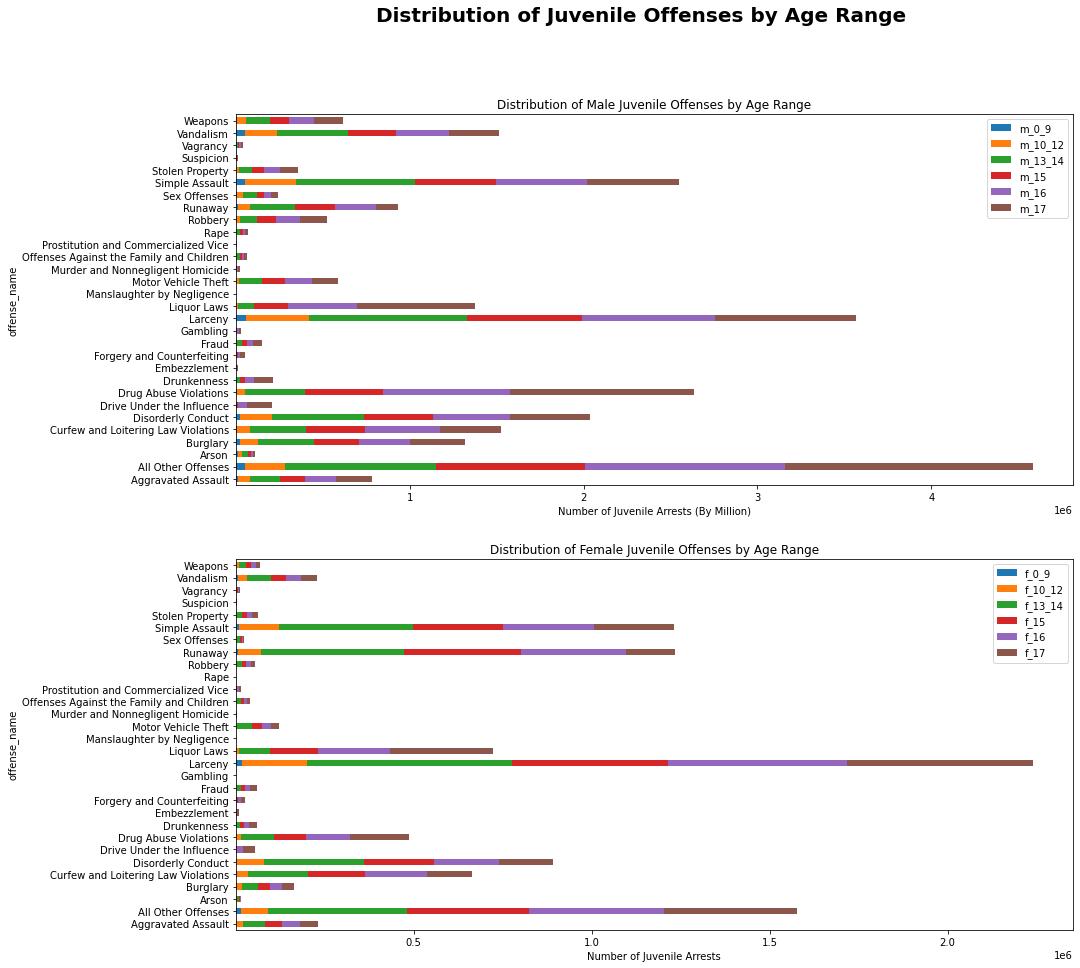

In [185]:
# Break down the number of offences by age range

# Divide the DataFrame into sub-DataFrames by gender and age range

male_age_offenses = data[["m_0_9", "m_10_12", "m_13_14", "m_15", "m_16", "m_17", "offense_name"]]
male_age_offenses = male_age_offenses.groupby("offense_name")["m_0_9", "m_10_12", "m_13_14", "m_15", "m_16", "m_17"].sum()

female_age_offenses = data[["offense_name","f_0_9", "f_10_12", "f_13_14", "f_15", "f_16", "f_17"]]
female_age_offenses = female_age_offenses.groupby("offense_name")["f_0_9", "f_10_12", "f_13_14", "f_15", "f_16", "f_17"].sum()

# Create a stacked barplots
ax = plt.subplot(2,1,1)
male_age_offenses.plot(figsize = (15,15), kind='barh', stacked=True, ax = ax)
plt.xlabel("Number of Juvenile Arrests (By Million)")
plt.title("Distribution of Male Juvenile Offenses by Age Range")

ax = plt.subplot(2,1,2)
female_age_offenses.plot(figsize = (15,15), kind='barh', stacked=True, ax = ax)
plt.xlabel("Number of Juvenile Arrests")
plt.title("Distribution of Female Juvenile Offenses by Age Range")

plt.suptitle("Distribution of Juvenile Offenses by Age Range", fontsize = 20, fontweight = "bold")

From the plot above we see a few interesting trends

For males:
* The most common offenses are "All Other Offenses", "Larceny", and "Simple Assault"
* The distribution of the age ranges differ between different offenses, therefore further investigation needs to be done on that

For females:
* The most common offenses include those mentioned previously as well as "Runaway"
* "Runaway" is the most notable offense that is greater for females than males

Text(0.5, 0.98, 'Distribution of Male Age Ranges for Juvenile Offense (1994 - 2016)')

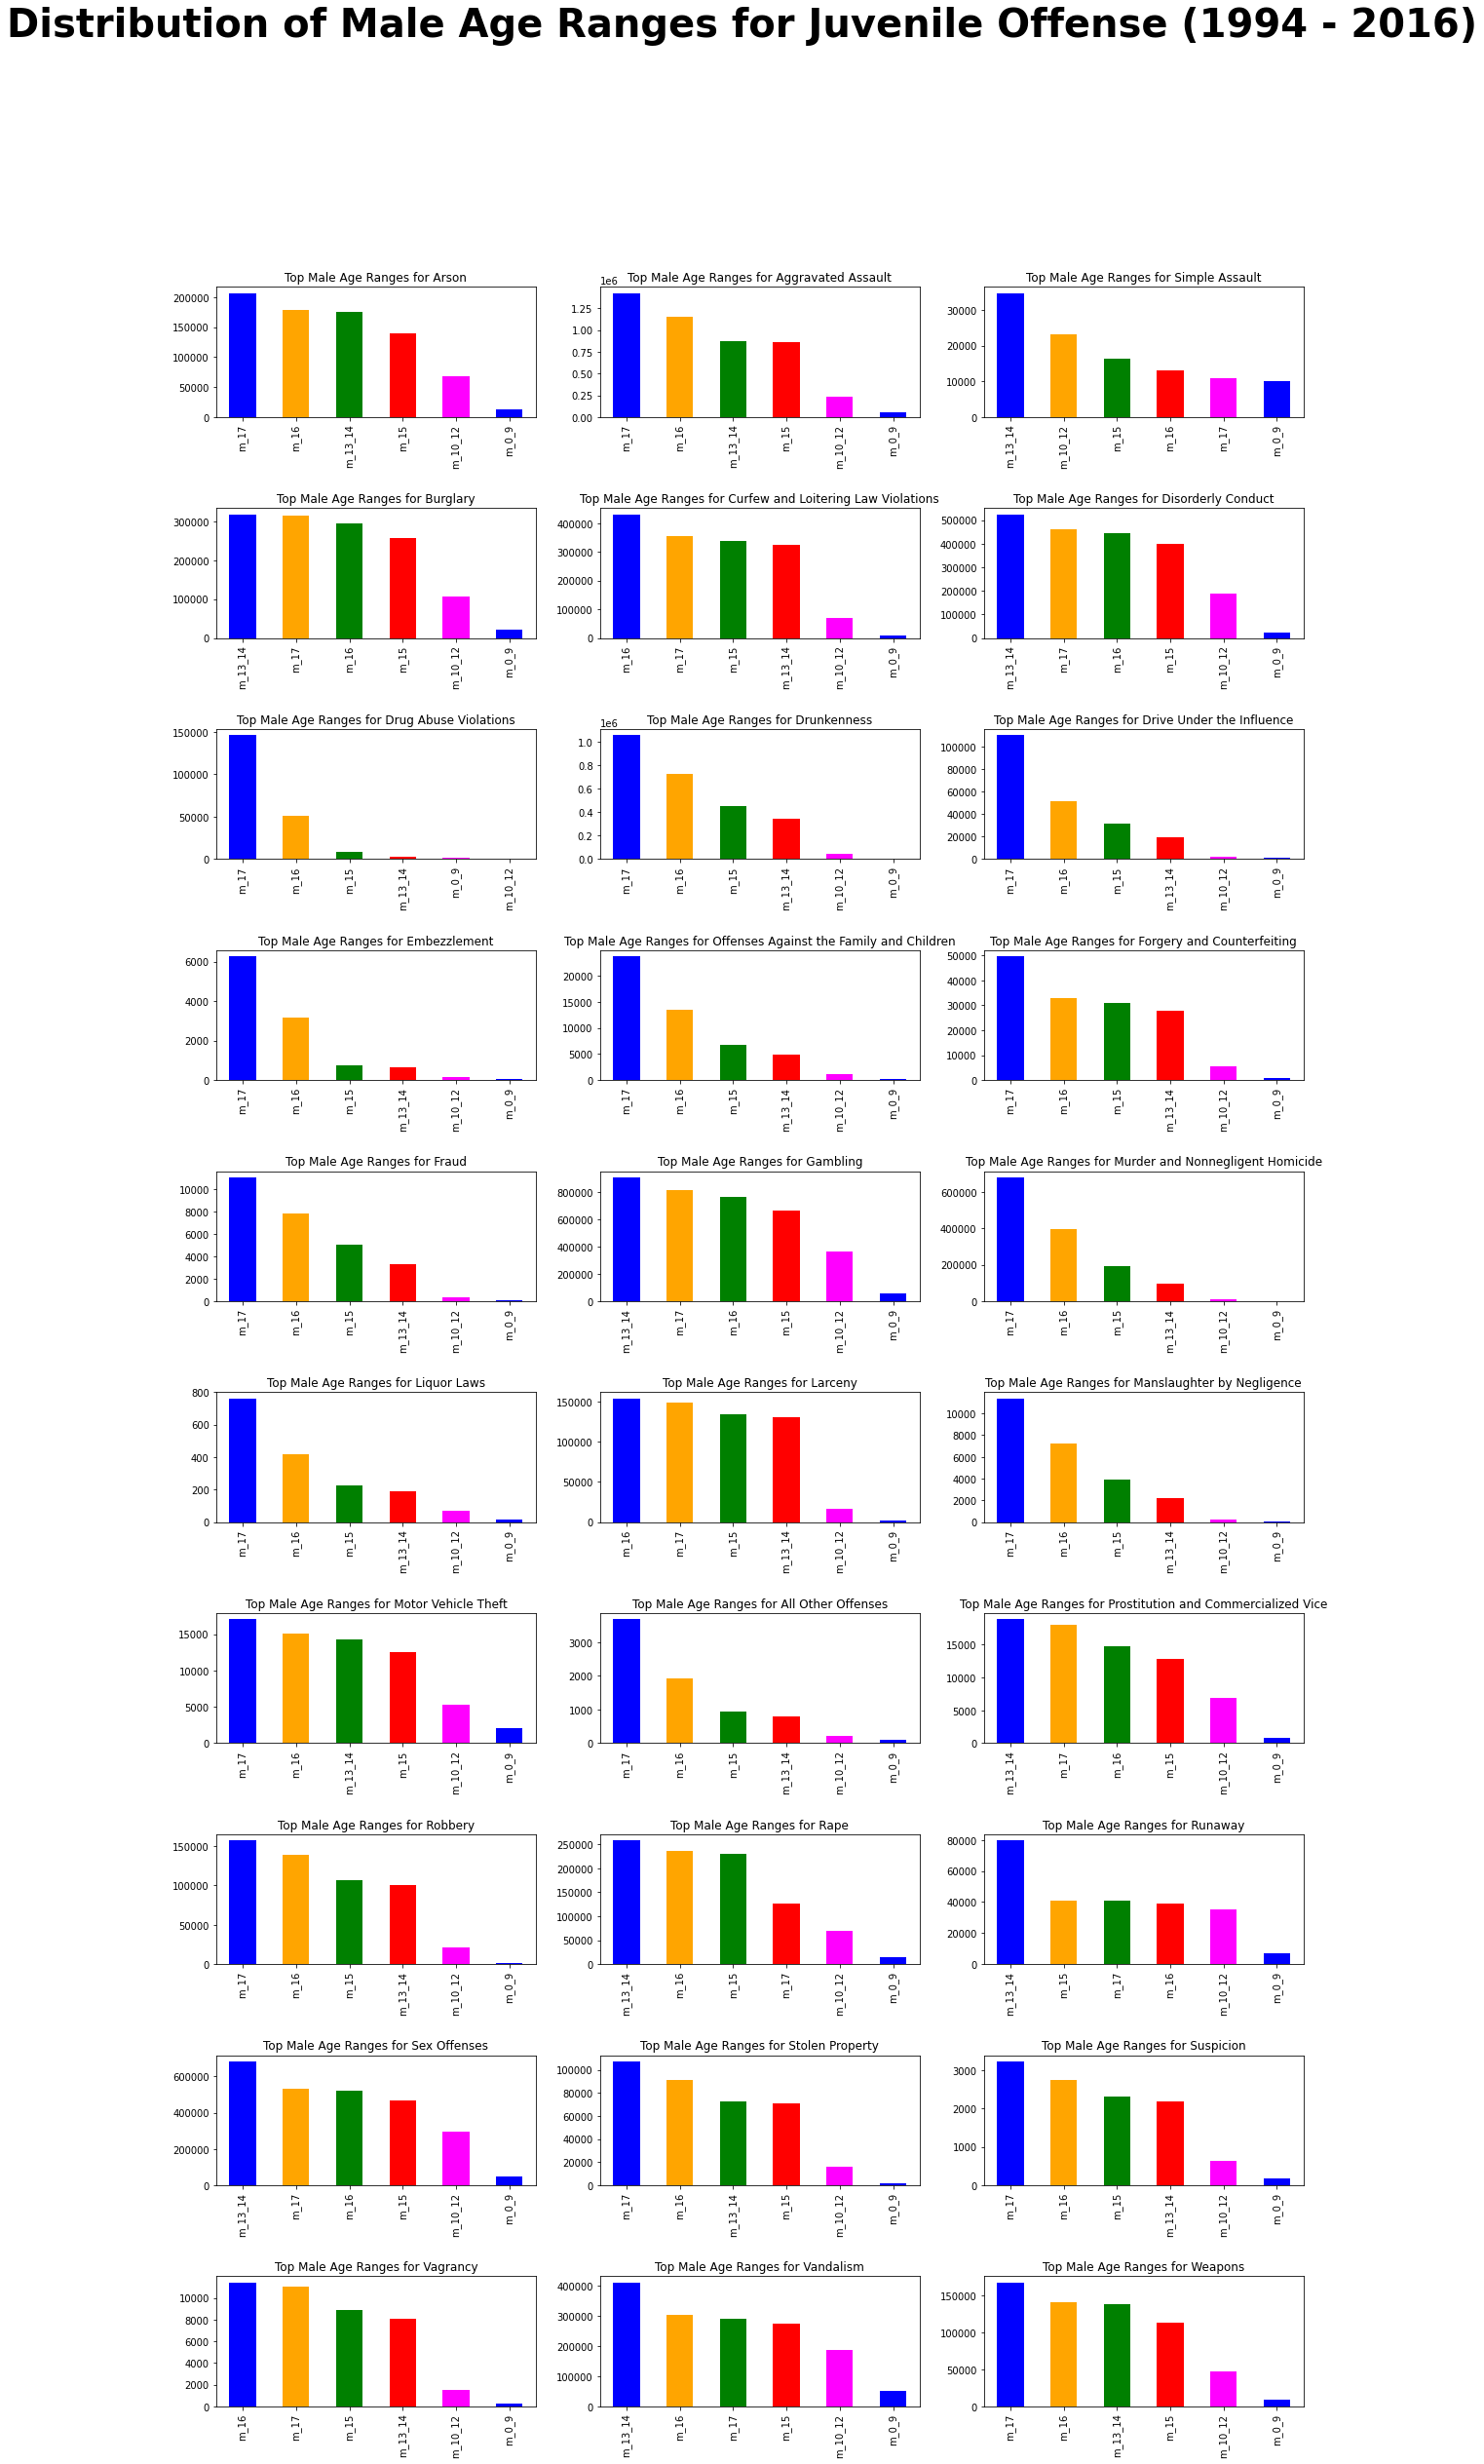

In [194]:
# Breakdown each offenses and find the top age ranges based on gender and total

offenses_list = data["offense_name"].unique().tolist()

# Males

# Iterate through the offenses to create individual barplots for the offenses
plt.figure(figsize = (20,40))
for i, offense in enumerate(offenses_list):
    ax = plt.subplot(10,3,i+1)
    plt.subplots_adjust(hspace=0.7)
    offense_row = male_age_offenses.iloc[i]
    sorted_offense_row = offense_row.sort_values(ascending = False)
    sorted_offense_row.plot.bar(color = ["blue", "orange", "green", "red", "magenta"])
    ax.set_title(f"Top Male Age Ranges for {offense}")
plt.suptitle("Distribution of Male Age Ranges for Juvenile Offense (1994 - 2016)", fontsize = 40, fontweight = "bold")

Among Males we have the Age Range Breakdown as Follows:

Age 0 - 9
* Had the lowest number of arrests for most offenses
* For Drug Abuse Violations, Males of 0 - 9 had higher arrests than Males of 10 - 12

Age 10 - 12
* Across most offenses, had the second least number of arrests
* For Drug Abuse Violations, had the least number of arrests
* Had the second highest number of Simple Assault offenses
    
Age 13 - 14
* Had the highest number of arrests for 
    - Simple Assault
    - Burglary
    - Disorderly Conduct
    - Gambling
    - Prostituion and Commerzialized Vice
    - Rape
    - Sex Offenses
    - Vandalism
* Nearly a quarter of all the male juvenile offenses had the highest number of arrests for males of age range 13 - 14
    
Age 15
* For all juvenile offenses, never had the highest number of arrests
    
Age 16
* Had the highest number of arrests for
    - Cerfew and Loitering Law Violations
    - Larceny
    - Vagrancy

Age 17
* Had the highest number of arrests for 
    - Arson
    - Aggravated Assault
    - Drug Abuse Violations
    - Drukenness
    - Drive Under Influence
    - Embezzlement
    - Offenses Against the Family and Children
    - Forgery and Counterfeiting
    - Fraud
    - Murder and Nonnegligent Homicide
    - Liquor Laws
    - Manslaughter by Negligence
    - Motor Vehicle Theft
    - All Other Offences
    - Robbery
    - Stolen Property
    - Suspicion
    - Weapons
        
Overall, the most surprising find is the number of juvenile offenses done by males of age 13 - 14. Especially looking at the specific offenses, it is very surprsing to see rape, prostitution, and sex offenses being mostly done by 13 - 14 year olds. Seeing males of age 16 and 17 having high offenses is not very surprising. The question is why specifically 13 - 14 year olds have a high number of arrests, much more than 15 year olds. One would expect the number of arrests for any crime go up as you get older however that is not always the case. Could this be due to the missing data? This is most likely not due to incorrectly inputting ages as this dataset is from the FBI.

Text(0.5, 0.98, 'Distribution of Female Age Ranges for Juvenile Offense (1994 - 2016)')

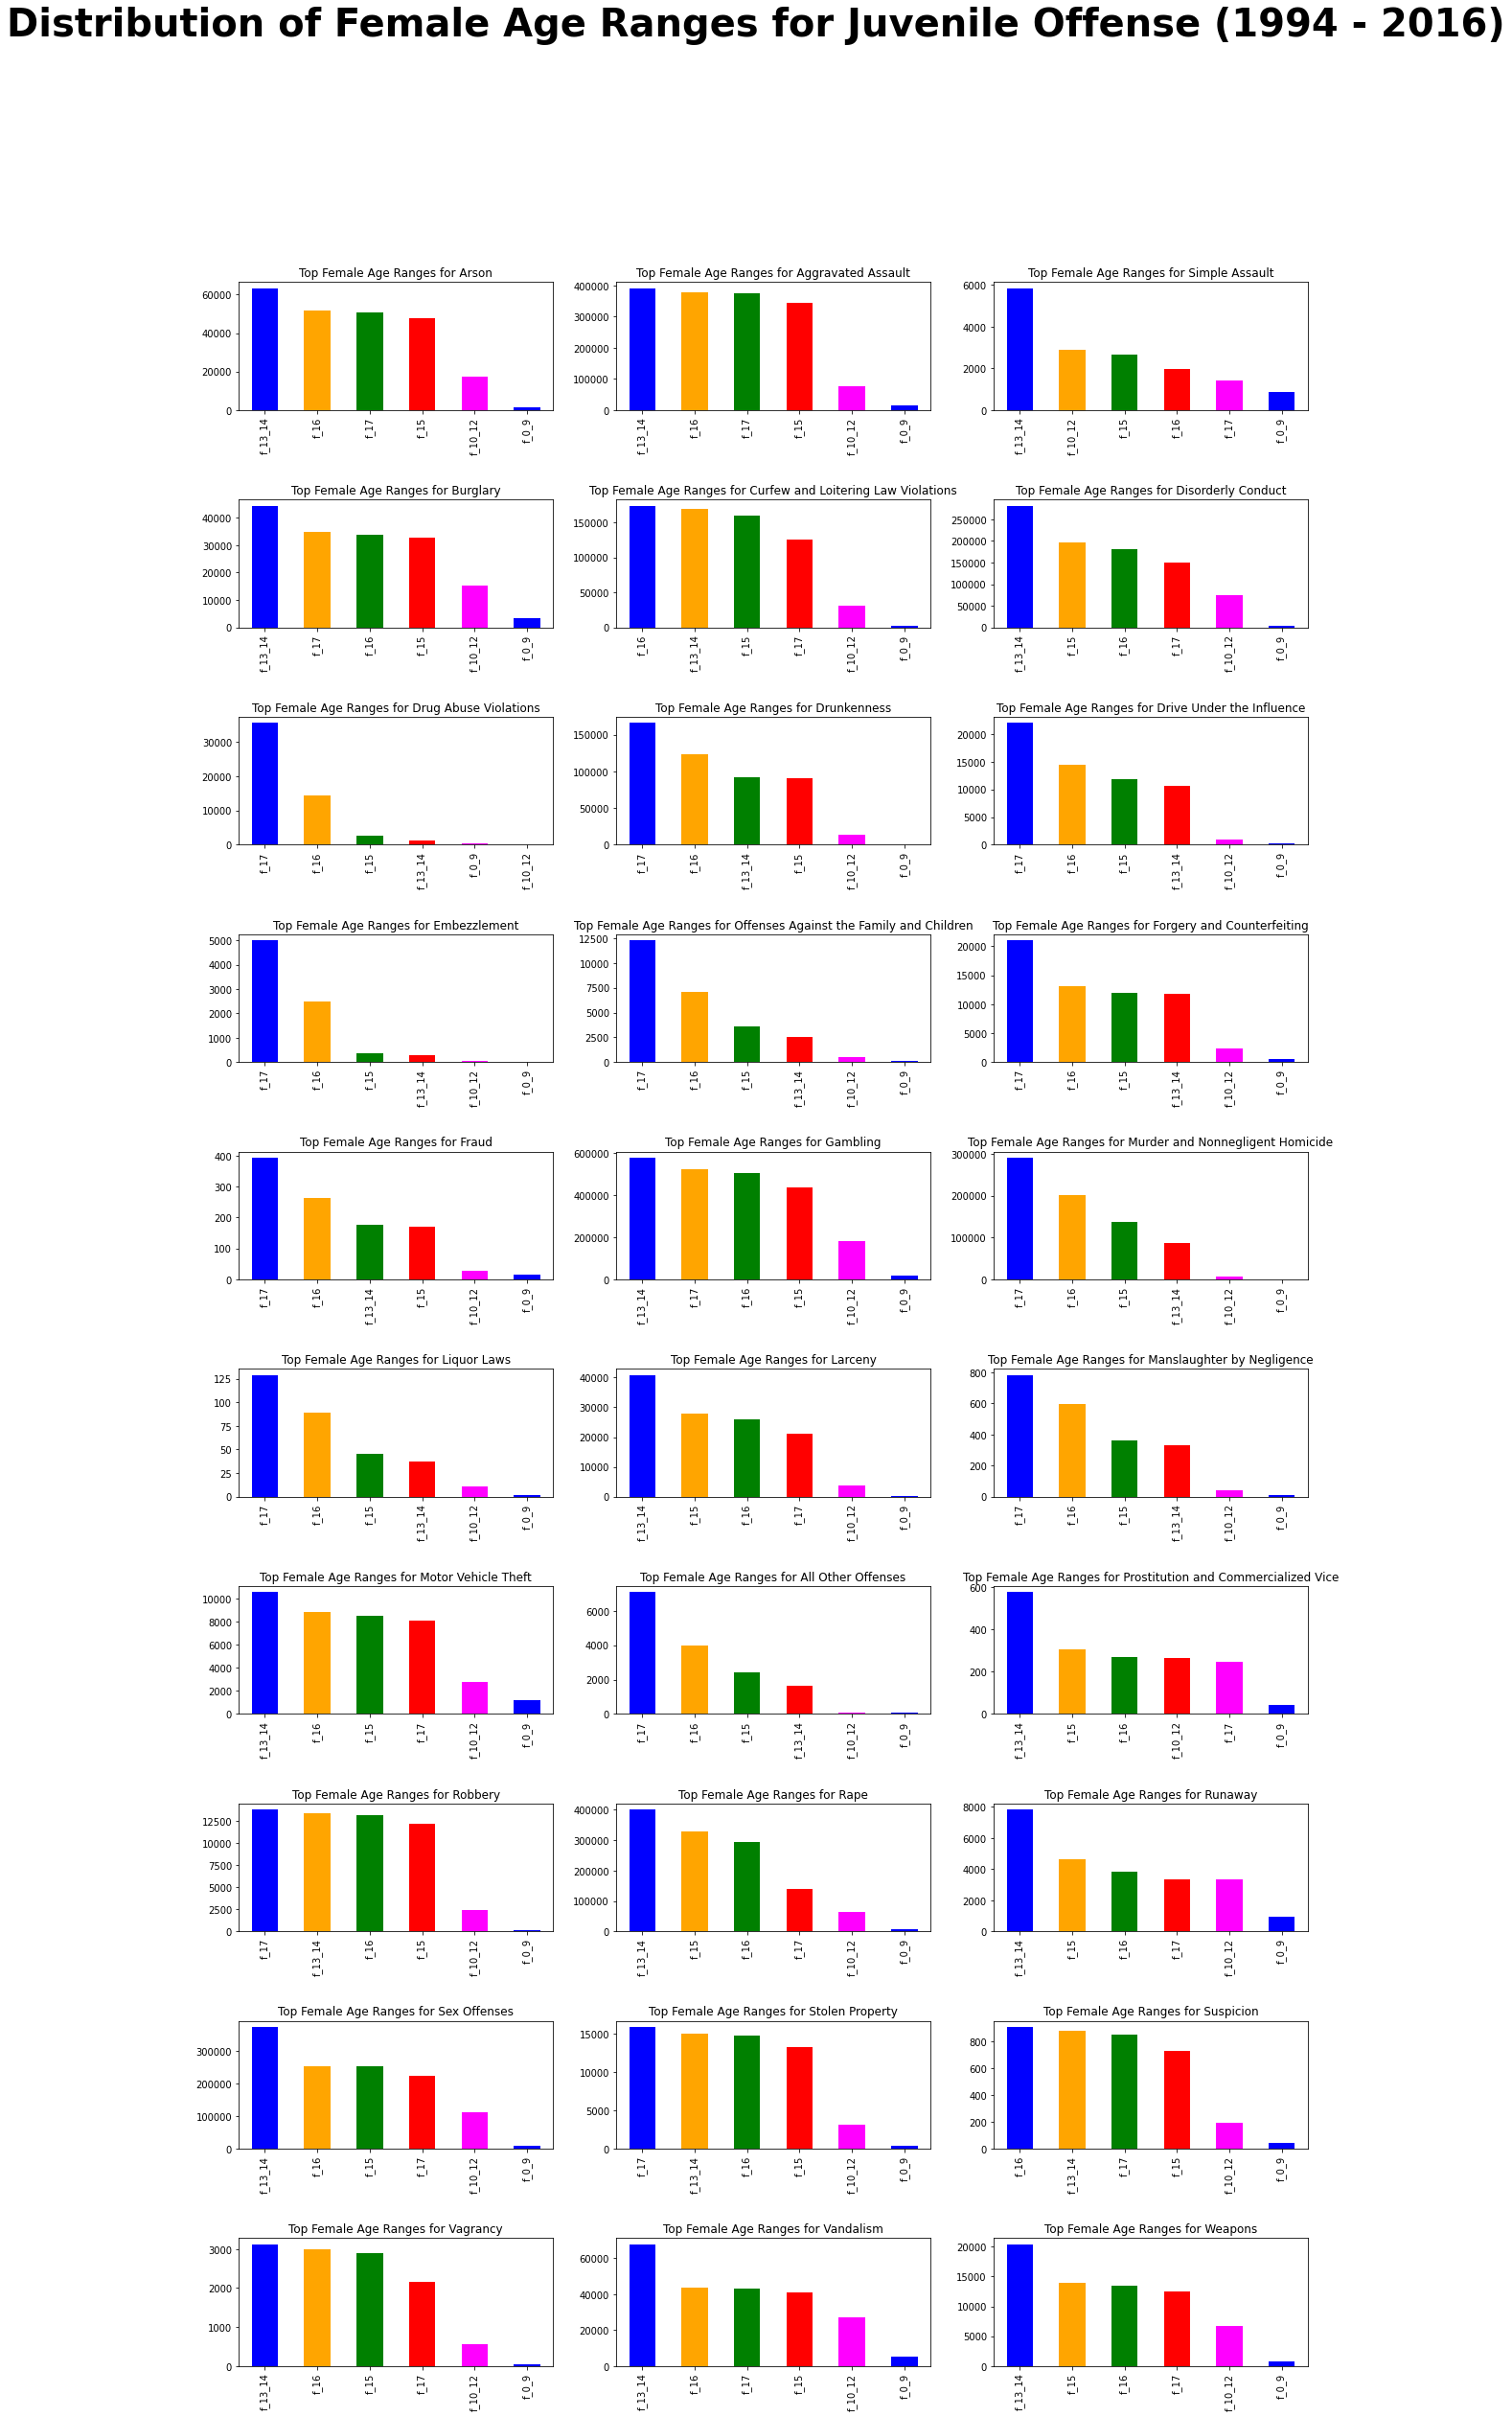

In [195]:
# Females

# Iterate through the offenses to create individual barplots for the offenses
plt.figure(figsize = (20,40))
for i, offense in enumerate(offenses_list):
    ax = plt.subplot(10,3,i+1)
    plt.subplots_adjust(hspace=0.7)
    offense_row = female_age_offenses.iloc[i]
    sorted_offense_row = offense_row.sort_values(ascending = False)
    sorted_offense_row.plot.bar(color = ["blue", "orange", "green", "red", "magenta"])
    ax.set_title(f"Top Female Age Ranges for {offense}")
plt.suptitle("Distribution of Female Age Ranges for Juvenile Offense (1994 - 2016)", fontsize = 40, fontweight = "bold")

Text(0.5, 0.98, 'Distribution of Age Ranges for Juvenile Offenses (1994 - 2016)')

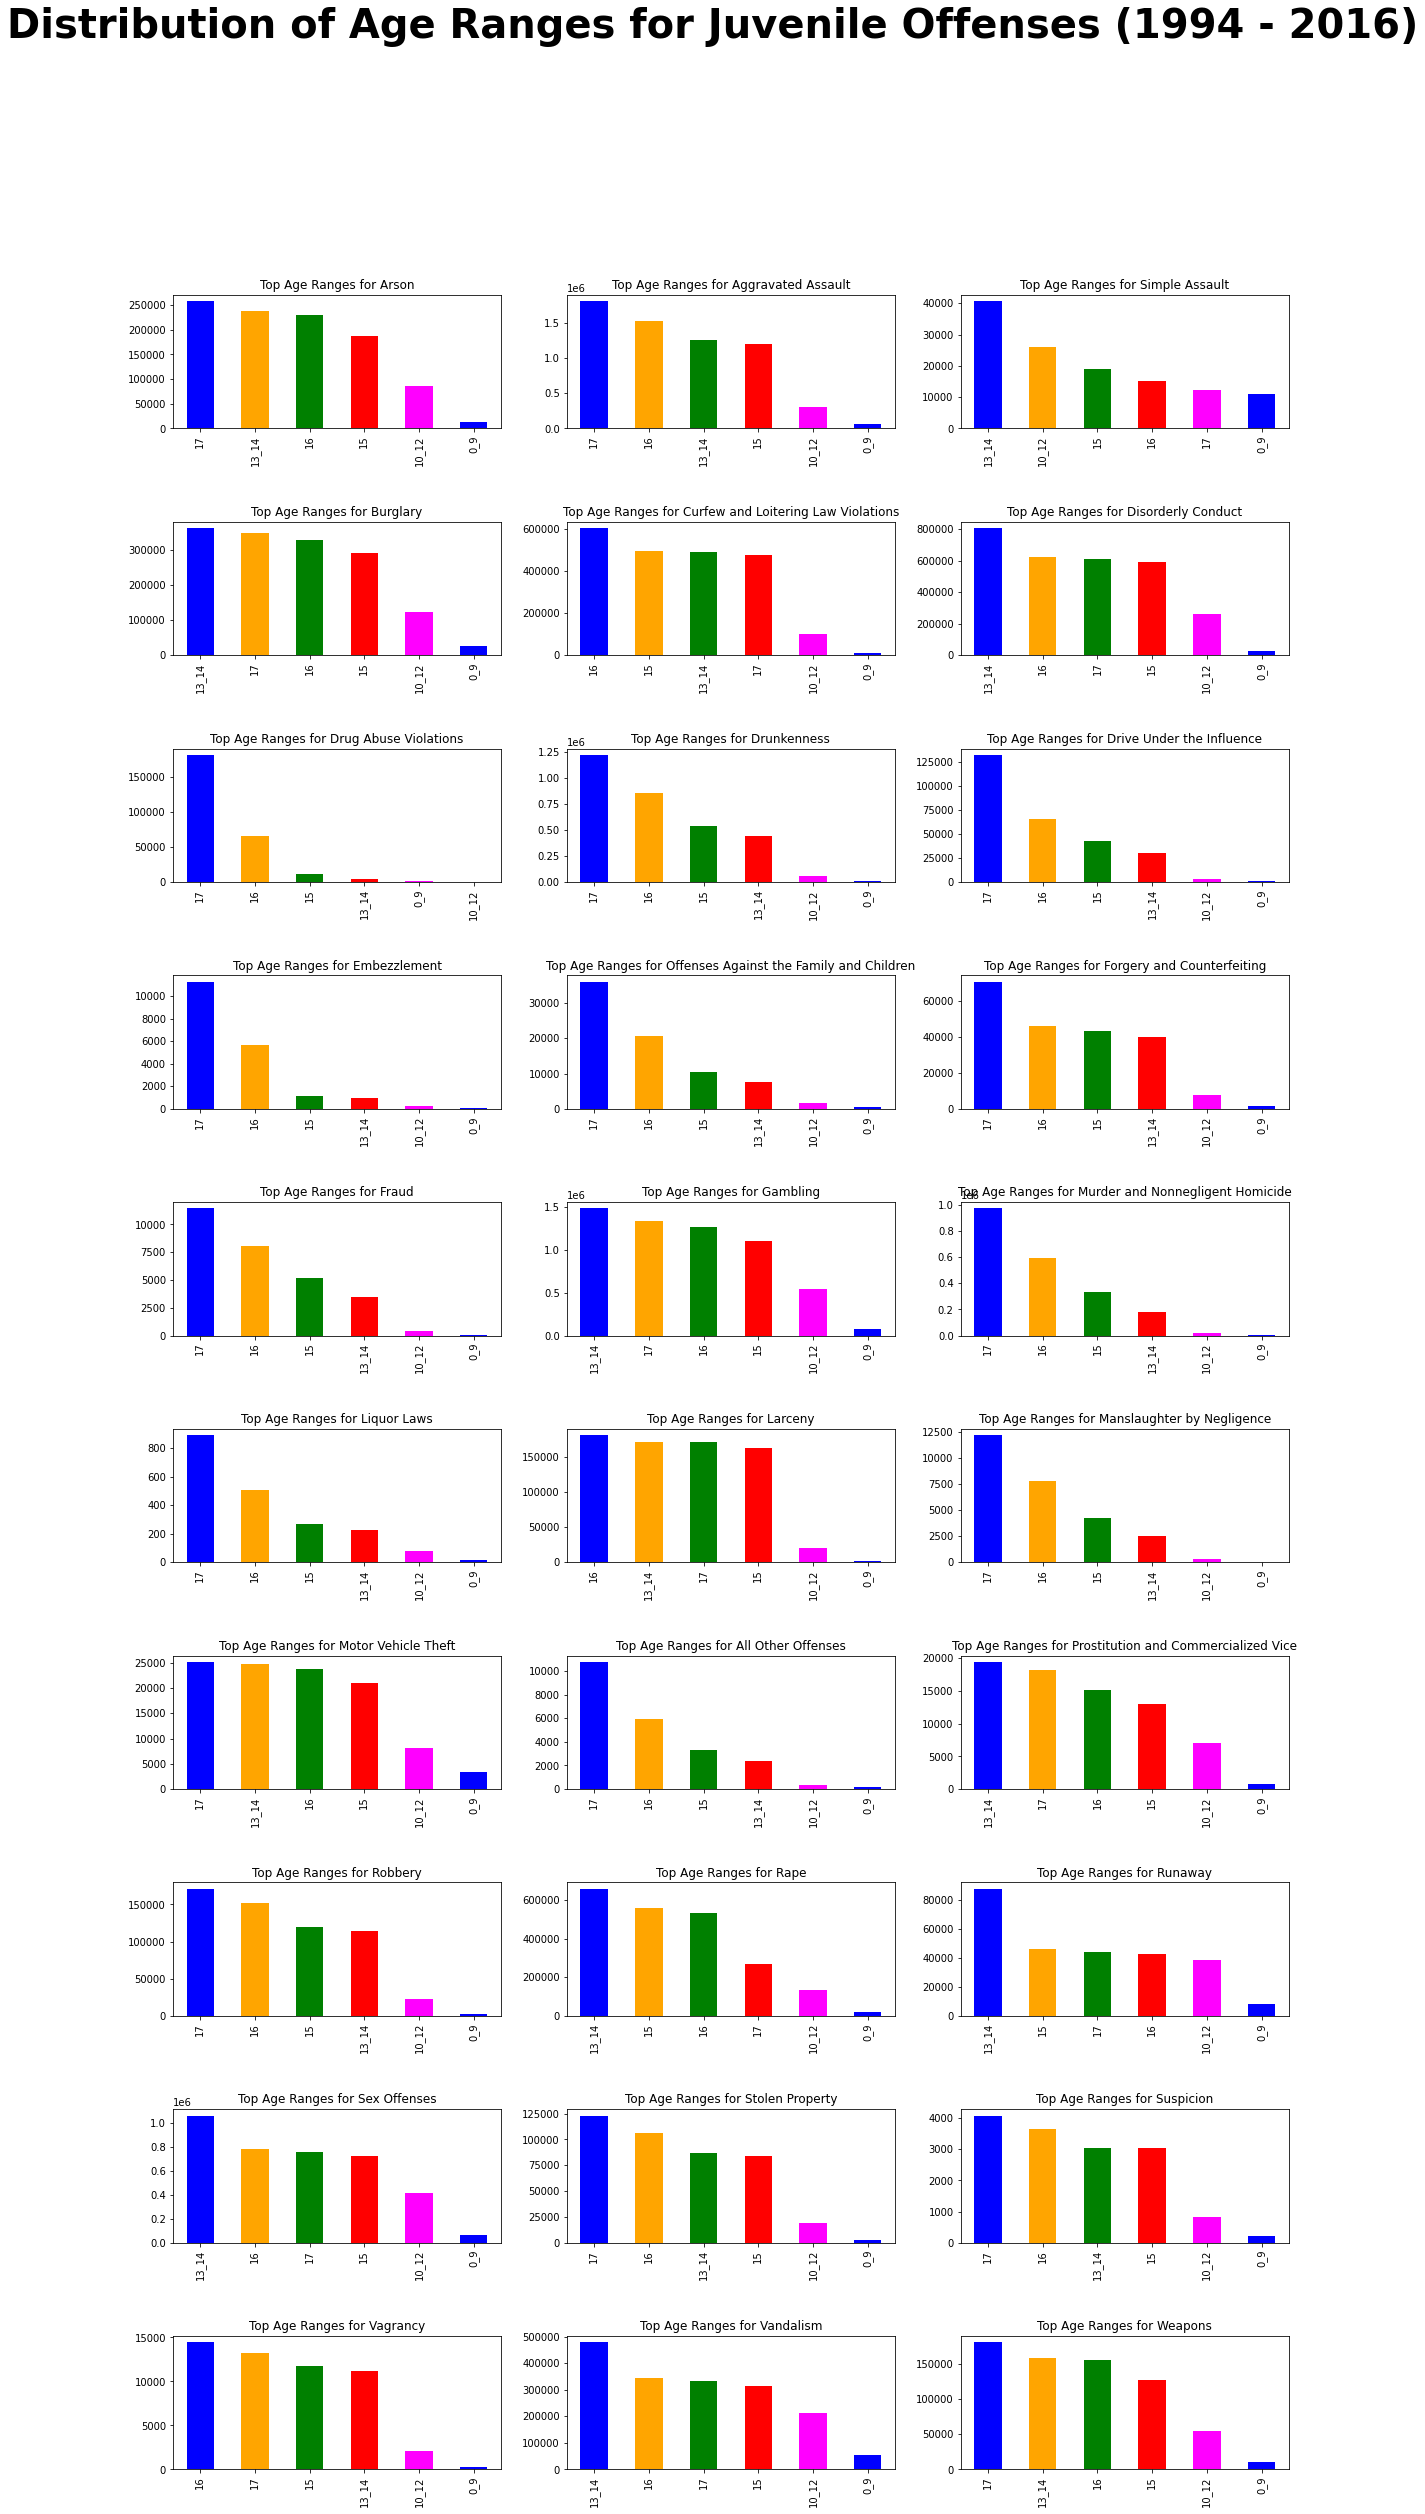

In [196]:
# Total
female_age_offenses.columns = ["0_9", "10_12", "13_14", "15", "16", "17"]
male_age_offenses.columns = ["0_9", "10_12", "13_14", "15", "16", "17"]


plt.figure(figsize = (20,40))
for i, offense in enumerate(offenses_list):
    ax = plt.subplot(10,3,i+1)
    plt.subplots_adjust(hspace=0.7)
    offense_row = pd.concat([female_age_offenses.iloc[i], male_age_offenses.iloc[i]],axis = 1).sum(axis = 1)
    sorted_offense_row = offense_row.sort_values(ascending = False)
    sorted_offense_row.plot.bar(color = ["blue", "orange", "green", "red", "magenta"])
    ax.set_title(f"Top Age Ranges for {offense}")
plt.suptitle("Distribution of Age Ranges for Juvenile Offenses (1994 - 2016)", fontsize = 40, fontweight = "bold")